# Clustering in Real World

Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

## Dominant colors in images

* Perform k-means on standardized RGB values to find cluster centers.

k means clustering can cluster images into groups,which can then be identified into various surface features like water and vegetation.

**Tools to find dominant colors**

* Convert image to pixels: matplotlib.image.imread
* Display colors of cluster centers: matplotlib.pyplot.imshow

Standardized value of a variable x is $x\_scaled=\frac {x}{\sigma (x)}$ thus that variable divided by it's standard deviation.

We would display the colors through the imshow method, which takes RGB values that have been scaled to the range of 0 to 1. To do so, we need to multiply the standardized values of the cluster centers with their corresponding standard deviations. We saw earlier that actual RGB values take the maximum value of 255, hence we divide it by 255 to get a scaled value in the range of 0-1.

Note that you need to provide the colors variable encapsulated as a list, as the imshow method expects a MxNx3 matrix to display a 2D grid of colors.

By doing this, we are providing a 1xNx3 matrix, which tells imshow method to display only one row of colors, where N is the number of clusters.

## Extract RGB values from image

Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

* Extract RGB values into three lists.
* Perform k-means clustering on scaled RGB values.
* Display the colors of cluster centers.
To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.

![batman](batman.jpg)



**Instructions**

* Import image class of matplotlib.
* Read the image using the imread() function and print the dimensions of the resultant matrix.
* Store the values for the three colors from all pixels in lists r, g and b.

In [5]:
r = []
g = []
b = []

In [1]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image)

[[[36 28 25]
  [39 21 19]
  [52 20 21]
  ...
  [30 31 51]
  [12 32 59]
  [26 56 80]]

 [[ 7  6  2]
  [10  0  0]
  [16  0  0]
  ...
  [12  0 17]
  [ 0  6 30]
  [17 29 51]]

 [[ 0  3  1]
  [ 4  3  1]
  [13  1  3]
  ...
  [30  0 12]
  [10  1 20]
  [30 23 41]]

 ...

 [[ 0  2 11]
  [ 4  7 12]
  [ 5  5  3]
  ...
  [ 8  0  2]
  [ 6  2  3]
  [27 25 26]]

 [[ 0  6  0]
  [ 0  5  0]
  [ 0  3  0]
  ...
  [ 9  0  3]
  [ 6  2  3]
  [27 25 26]]

 [[25 32 25]
  [26 32 20]
  [28 31 14]
  ...
  [34 25 28]
  [18 14 15]
  [51 49 50]]]


In [2]:
batman_image.shape

(169, 269, 3)

In [3]:
for row in batman_image:
    print(row)

[[36 28 25]
 [39 21 19]
 [52 20 21]
 [61 27 28]
 [37 15 18]
 [35 33 38]
 [19 33 42]
 [ 0 17 30]
 [ 8 24 40]
 [15 18 33]
 [21 15 25]
 [26 17 22]
 [29 20 21]
 [29 23 23]
 [27 23 24]
 [24 19 25]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [24 23 21]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 25 23]
 [26 19 35]
 [26 20 34]
 [26 20 32]
 [26 21 28]
 [26 21 27]
 [26 22 23]
 [26 22 21]
 [26 22 19]
 [28 24 21]
 [28 24 21]
 [28 24 21]
 [28 24 23]
 [28 24 25]
 [28 23 27]
 [28 23 29]
 [28 23 30]
 [37 18 14]
 [36 18 16]
 [33 19 16]
 [29 21 18]
 [26 23 18]
 [23 24 19]
 [20 25 21]
 [19 25 21]
 [21 27 25]
 [21 27 25]
 [22 26 25]
 [24 26 25]
 [25 25 25]
 [26 25 23]
 [28 24 23]
 [28 24 23]
 [30 20 21]
 [30 20 21]
 [30 20 21]
 [30

In [6]:
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [7]:
r[0:5]

[36, 39, 52, 61, 37]

You have successfully extracted the RGB values of the image into three lists, one for each color channel.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten

In [9]:
batman_df=pd.DataFrame({'red':r,'blue':b,'green':g})
batman_df['scaled_red']=whiten(batman_df['red'])
batman_df['scaled_blue']=whiten(batman_df['blue'])
batman_df['scaled_green']=whiten(batman_df['green'])
batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,25,28,0.450157,0.279912,0.370103
1,39,19,21,0.487671,0.212733,0.277577
2,52,21,20,0.650227,0.235126,0.264359
3,61,28,27,0.762767,0.313502,0.356885
4,37,18,15,0.462662,0.201537,0.198269


## How many dominant colors?
We have loaded the following image using the imread() function of the image class of matplotlib.

![batman](batman.jpg)

The RGB values are stored in a data frame, batman_df. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the data frame. How many dominant colors are present?

**Instructions**

* Create a list of distortions based on each value in num_clusters by running the kmeans() function.
* Create a data frame elbow_plot with the lists: num_clusters and distortions.
* Plot the data with seaborn's .lineplot() method with num_clusters on the x-axis and distortions on the y-axis.

In [11]:
from scipy.cluster.vq import kmeans, vq

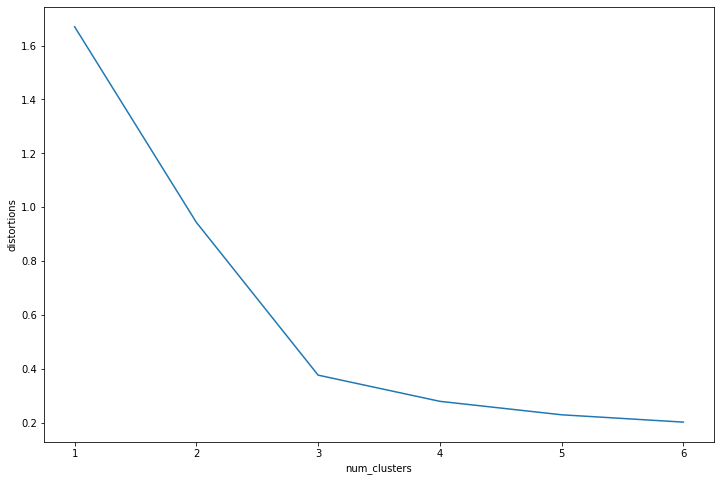

In [13]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

fig=plt.figure(figsize=(12,8))
# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

### Display dominant colors

We have loaded the following image using the imread() function of the image class of matplotlib.

![batman](batman.jpg)

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 

```python
converted_pixel = standardized_pixel * pixel_std / 255
```
The RGB values are stored in a data frame, batman_df. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

In [21]:
batman_df.describe()

,red,blue,green,scaled_red,scaled_blue,scaled_green
count,45461.000000,45461.000000,45461.000000,45461.000000,45461.000000,45461.000000
mean,82.611051,87.249225,75.164119,1.032999,0.976885,0.993515
std,79.972898,89.314708,75.655537,1.000011,1.000011,1.000011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,5.000000,0.100035,0.100768,0.066090
50%,74.000000,66.000000,65.000000,0.925324,0.738968,0.859167
75%,127.000000,153.000000,149.000000,1.588055,1.713063,1.969474
max,248.000000,255.000000,238.000000,3.101085,2.855104,3.145872


In [23]:
cluster_centers

array([[0.32825869, 0.42316454, 0.36331525],
       [1.41101564, 0.38243918, 0.41939113],
       [2.65320287, 0.78224748, 0.90381688],
       [1.06312655, 2.65581584, 2.62274727],
       [0.07823914, 0.06482823, 0.0424244 ],
       [0.797856  , 1.55797657, 1.66119999]])

**Instruction**

* Get standard deviations of each color from the data frame and store it in r_std, g_std, b_std.
* For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1.
* Display the colors of the cluster centers.

In [ ]:
#import matplotlib.image as img

In [24]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
print(r_std,g_std,b_std)

79.97289804454292 75.65553732536243 89.31470781584959


In [30]:
colors=[]
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
colors

[(0.10294823137338491, 0.1255480037852165, 0.12725253149668275),
 (0.44252160617152914, 0.11346526181389482, 0.14689331784689785),
 (0.8320953842416421, 0.23208374023944103, 0.31656525615211256),
 (0.3334169063844839, 0.7879497045256002, 0.9186270825977478),
 (0.024537297528157066, 0.019233781188893833, 0.014859304086662832),
 (0.25022296670871125, 0.46223354626902474, 0.5818415364766693)]

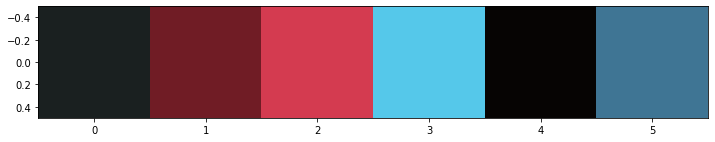

In [31]:
fig=plt.figure(figsize=(12,12))
# Display colors of cluster centers
plt.imshow([colors])
plt.show()

 Notice the three colors resemble the three that are indicative from visual inspection of the image.